<a href="https://colab.research.google.com/github/akulkarni14/SDL-Practicals/blob/main/S%26DLPR4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   cgpa  package
0  6.89     3.26
1  5.12     1.98
2  7.82     3.25
3  7.42     3.67
4  6.94     3.57
Underfitting (Degree 1) | Degree: 1 | MSE: 0.113
Good Fit (Degree 2) | Degree: 2 | MSE: 0.112
Overfitting (Degree 10) | Degree: 10 | MSE: 0.107


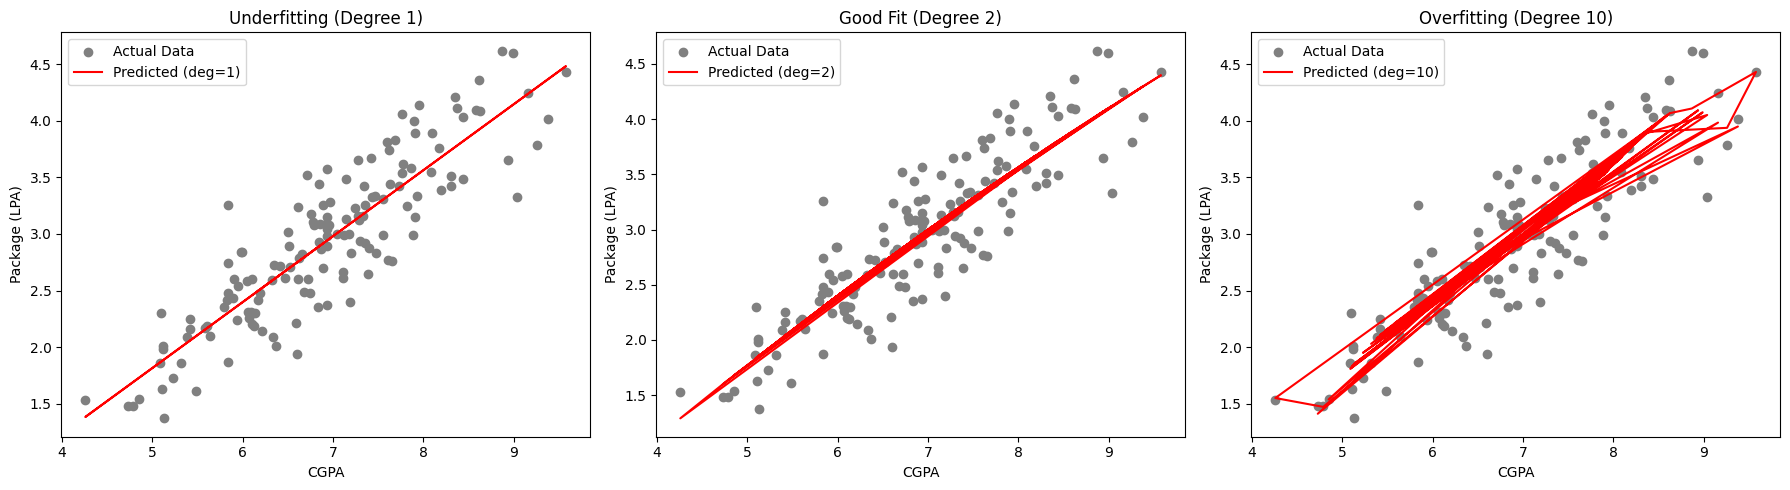

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# --------------------------
# Load your own dataset
# --------------------------
df = pd.read_csv("placement.csv")  # Replace with your actual file name
print(df.head())

# Extract features
X = df['cgpa'].values.reshape(-1, 1)
y = df['package'].values

# --------------------------
# Plotting Function
# --------------------------
def plot_model_fit(degree, subplot_index, title):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    y_pred = model.predict(X_poly)

    plt.subplot(1, 3, subplot_index)
    plt.scatter(X, y, color='gray', label='Actual Data')
    plt.plot(X, y_pred, color='red', label=f'Predicted (deg={degree})')
    plt.title(title)
    plt.xlabel('CGPA')
    plt.ylabel('Package (LPA)')
    plt.legend()
    mse = mean_squared_error(y, y_pred)
    print(f"{title} | Degree: {degree} | MSE: {mse:.3f}")

# --------------------------
# Plot All 3 Fits
# --------------------------
plt.figure(figsize=(18, 5))

# Underfitting (Degree 1)
plot_model_fit(degree=1, subplot_index=1, title="Underfitting (Degree 1)")

# Good Fit (Degree 2)
plot_model_fit(degree=2, subplot_index=2, title="Good Fit (Degree 2)")

# Overfitting (Degree 10)
plot_model_fit(degree=10, subplot_index=3, title="Overfitting (Degree 10)")

plt.tight_layout()
plt.show()
